## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from kneed import KneeLocator

In [33]:
df = pd.read_csv('WineData.csv')
df.head()

Unnamed: 0  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  \
0           0    14.23        1.71  2.43          15.6        127   
1           1    13.20        1.78  2.14          11.2        100   
2           2    13.16        2.36  2.67          18.6        101   
3           3    14.37        1.95  2.50          16.8        113   
4           4    13.24        2.59  2.87          21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

In [34]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [35]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [36]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [37]:
df.corr()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.072343   -0.368710  0.003911     -0.276769   0.066004   
Proline               0.643720   -0.192011  0.223626     -0.440597   0.393351   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.289101    0.236815             -0.155929   
Malic_Acid                -0.335167   -0.411007              0.292977   
Ash                        0.128980    0.115077              0.186230   
Ash_Alcanity              -0.321113   -0.351370              0.361922   
Magnesium                  0.214401    0.195784             -0.256294   
Total_Phenols              1.000000    0.864564             -0.449935   
Flavanoids                 0.864564    1.000000             -0.537900   
Nonflavanoid_Phenols      -0.449935   -0.537900              1.000000   
Proanthocyanins            0.612413    0.652692             -0.365845   
Color_Intensity           -0.055136   -0.172379              0.139057   
Hue                        0.433681    0.543479             -0.262640   
OD280                      0.699949    0.787194             -0.503270   
Proline                    0.498115    0.494193             -0.311385   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.136698         0.546364 -0.071747  0.072343   
Malic_Acid                  -0.220746         0.248985 -0.561296 -0.368710   
Ash                          0.009652         0.258887 -0.074667  0.003911   
Ash_Alcanity                -0.197327         0.018732 -0.273955 -0.276769   
Magnesium                    0.236441         0.199950  0.055398  0.066004   
Total_Phenols                0.612413        -0.055136  0.433681  0.699949   
Flavanoids                   0.652692        -0.172379  0.543479  0.787194   
Nonflavanoid_Phenols        -0.365845         0.139057 -0.262640 -0.503270   
Proanthocyanins              1.000000        -0.025250  0.295544  0.519067   
Color_Intensity             -0.025250         1.000000 -0.521813 -0.428815   
Hue                          0.295544        -0.521813  1.000000  0.565468   
OD280                        0.519067        -0.428815  0.565468  1.000000   
Proline                      0.330417         0.316100  0.236183  0.312761   

                       Proline  
Alcohol               0.643720  
Malic_Acid           -0.192011  
Ash                   0.223626  
Ash_Alcanity         -0.440597  
Magnesium             0.393351  
Total_Phenols         0.498115  
Flavanoids            0.494193  
Nonflavanoid_Phenols -0.311385  
Proanthocyanins       0.330417  
Color_Intensity       0.316100  
Hue                   0.236183  
OD280                 0.312761  
Proline               1.000000

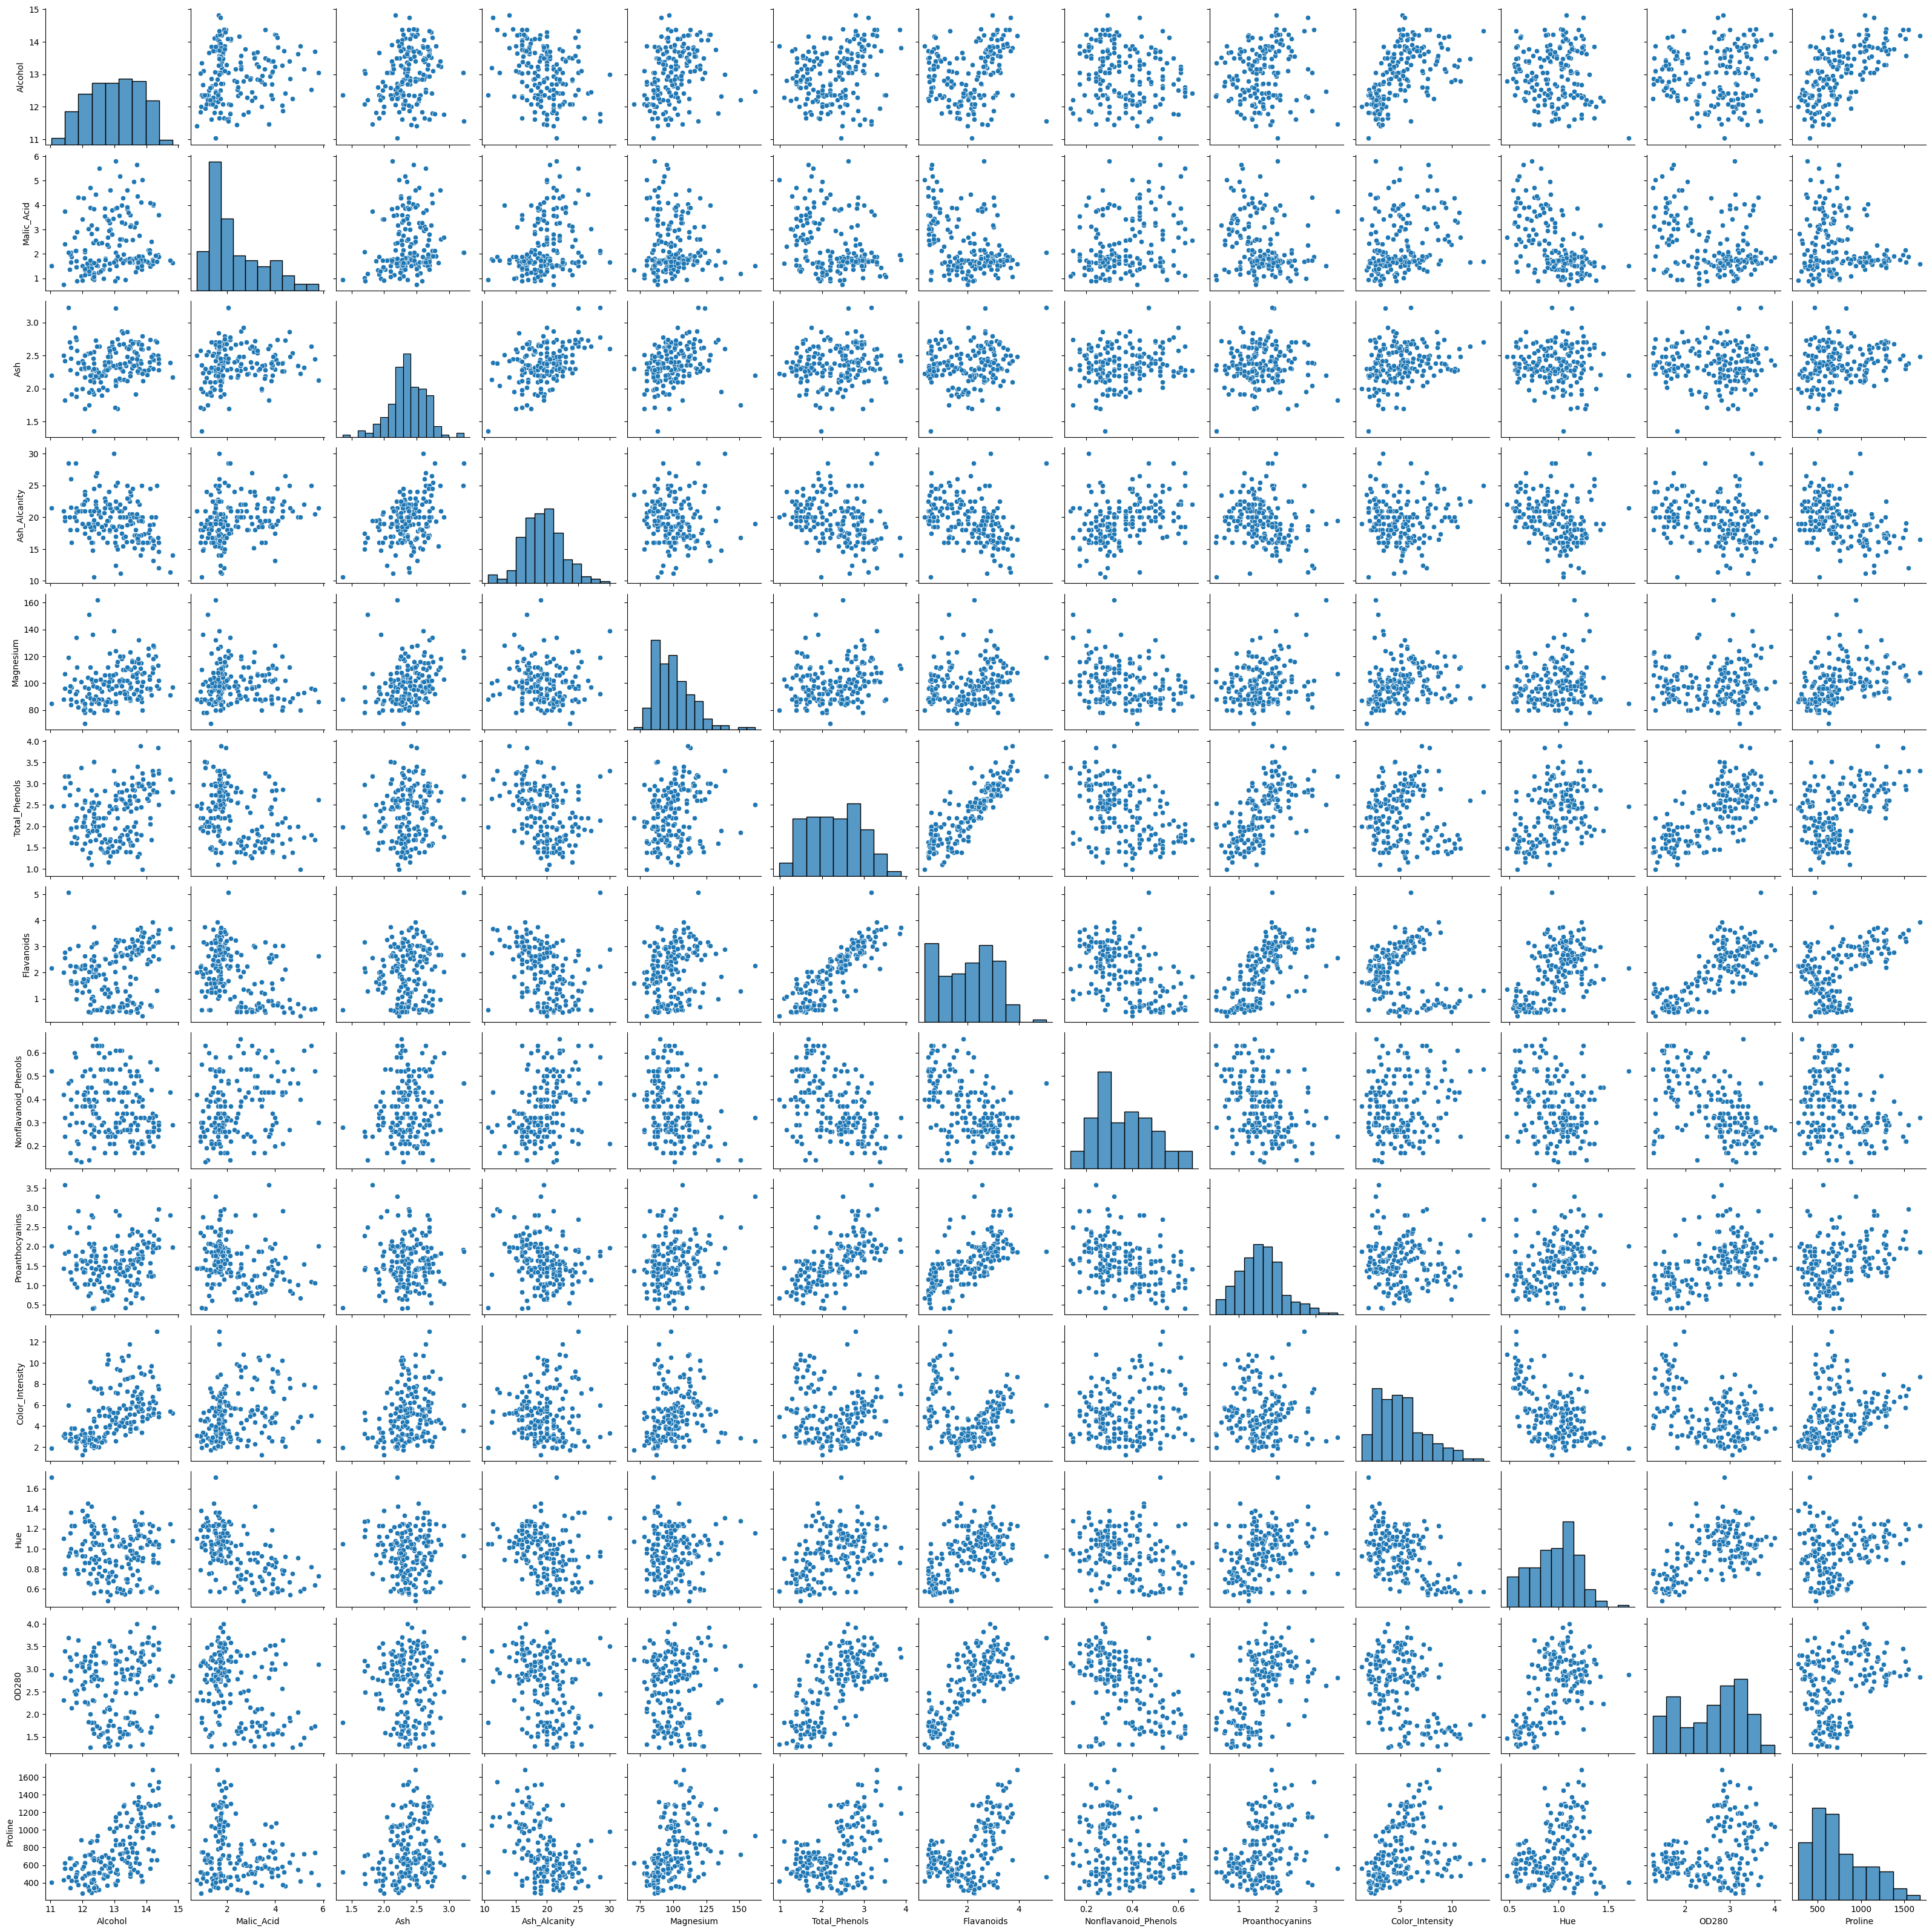

In [38]:
sns.pairplot(df)
plt.show()

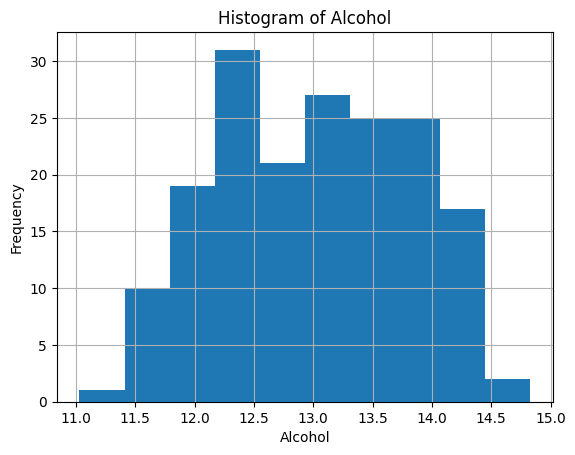

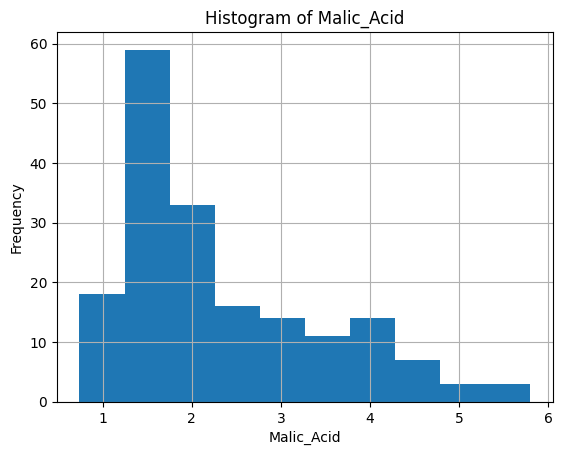

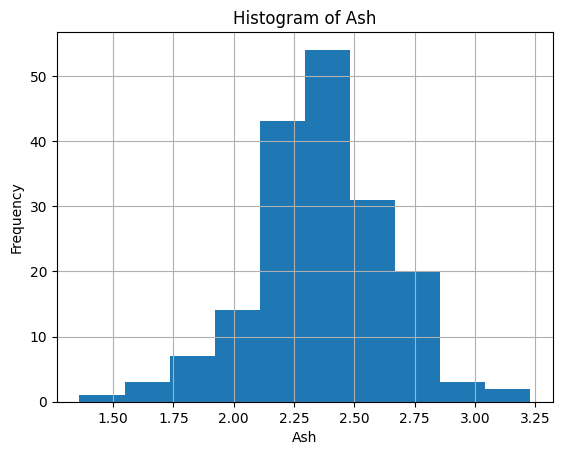

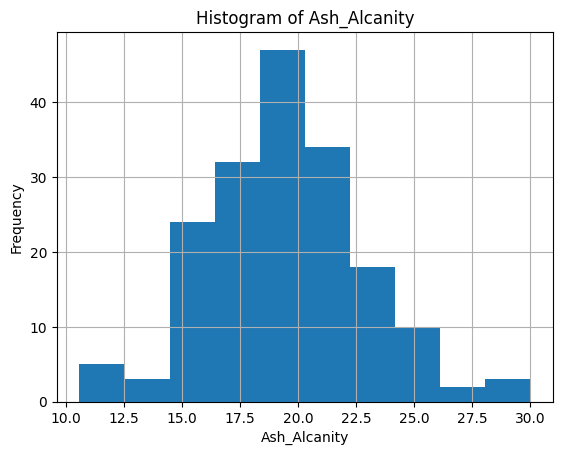

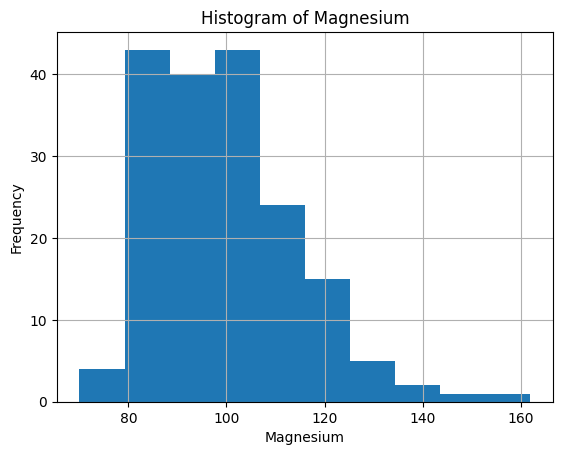

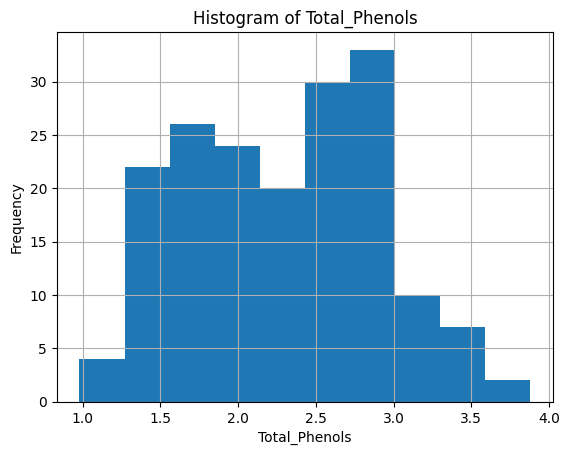

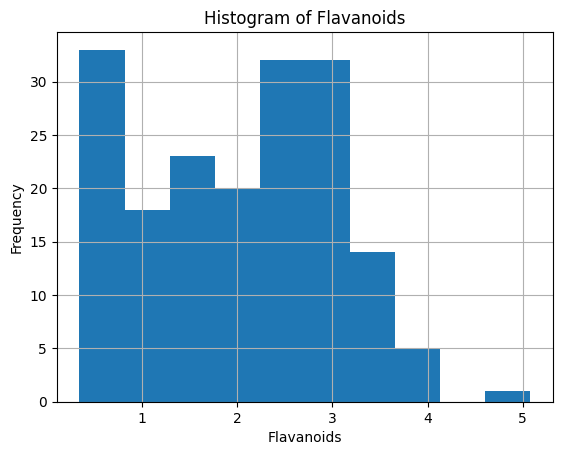

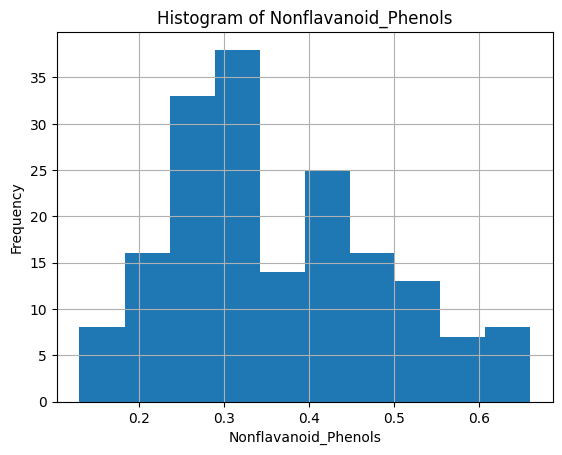

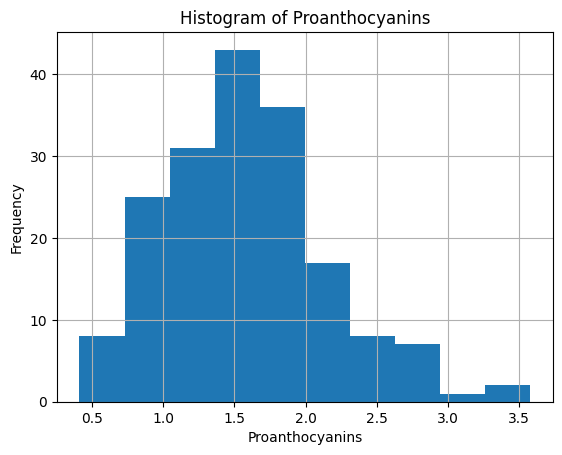

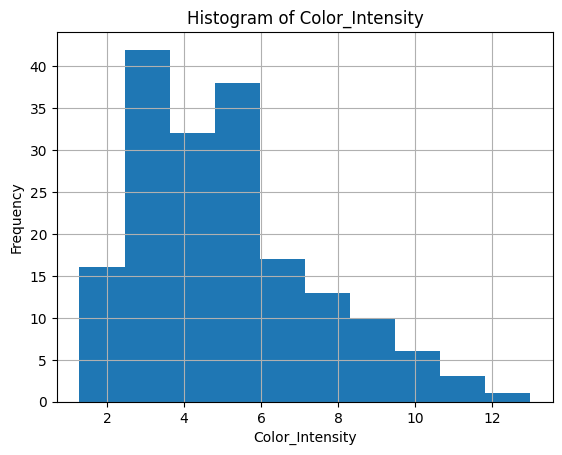

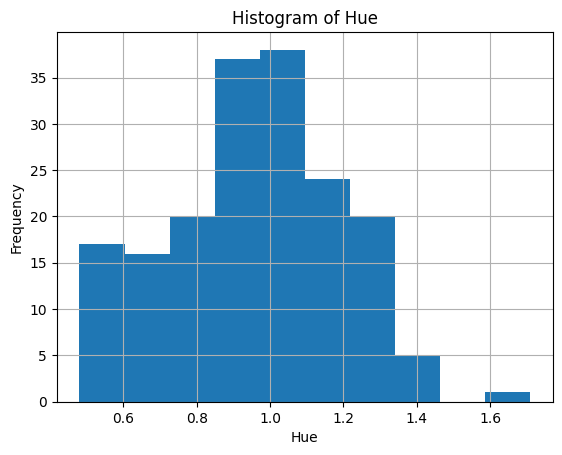

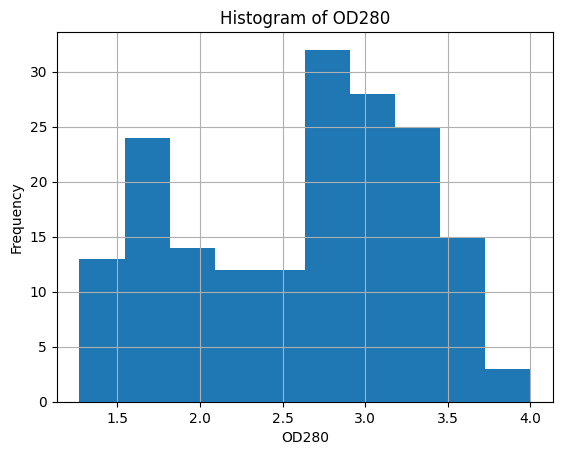

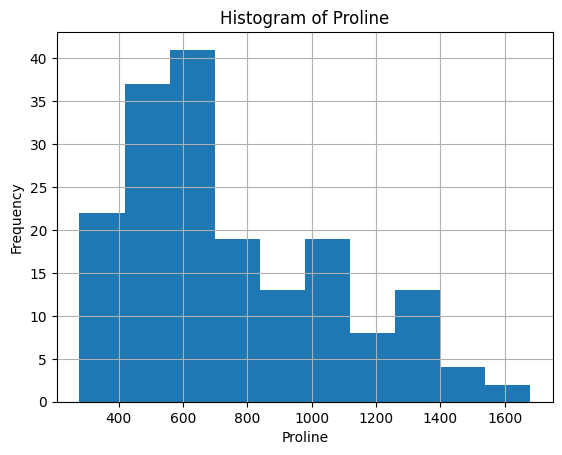

In [39]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    df[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [40]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns
)

In [41]:
df_scaled.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.965242  
2  0.318304  0.788587  1.395148  
3 -0.427544  1.184071  2.334574  
4  0.362177  0.449601 -0.037874

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



Optimal number of clusters (K): 3


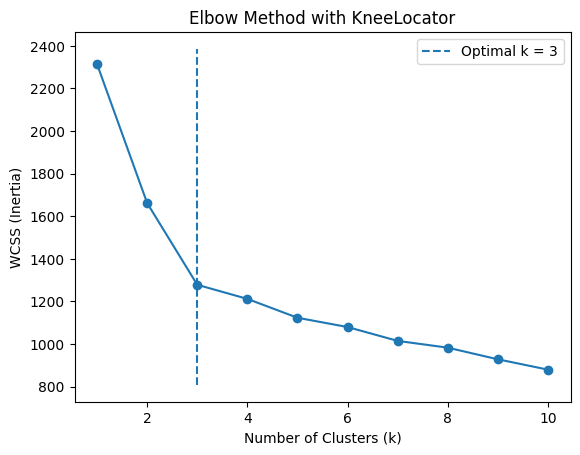

In [42]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Apply KneeLocator
knee = KneeLocator(
    k_range, 
    wcss, 
    curve="convex", 
    direction="decreasing"
)

optimal_k = knee.knee
print("Optimal number of clusters (K):", optimal_k)

# Plot elbow + knee point
plt.figure()
plt.plot(k_range, wcss, marker='o')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', label=f'Optimal k = {optimal_k}')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method with KneeLocator")
plt.legend()
plt.show()


In [43]:
optimal_k

3

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [44]:
# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# View result
df.head()


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        2  
1   3.40     1050        2  
2   3.17     1185        2  
3   3.45     1480        2  
4   2.93      735        2

In [45]:
print(df['Cluster'].value_counts())


Cluster
0    65
2    62
1    51
Name: count, dtype: int64


### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [46]:
# Analyze clusters by comparing mean values of each feature
cluster_means = df.groupby('Cluster').mean()
print("Mean values of features for each cluster:\n")
print(cluster_means)


Mean values of features for each cluster:

           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        12.250923    1.897385  2.231231     20.063077   92.738462   
1        13.134118    3.307255  2.417647     21.241176   98.666667   
2        13.676774    1.997903  2.466290     17.462903  107.967742   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               2.973077  1.062708  2.803385   510.169231  
1               7.234706  0.691961  1.69

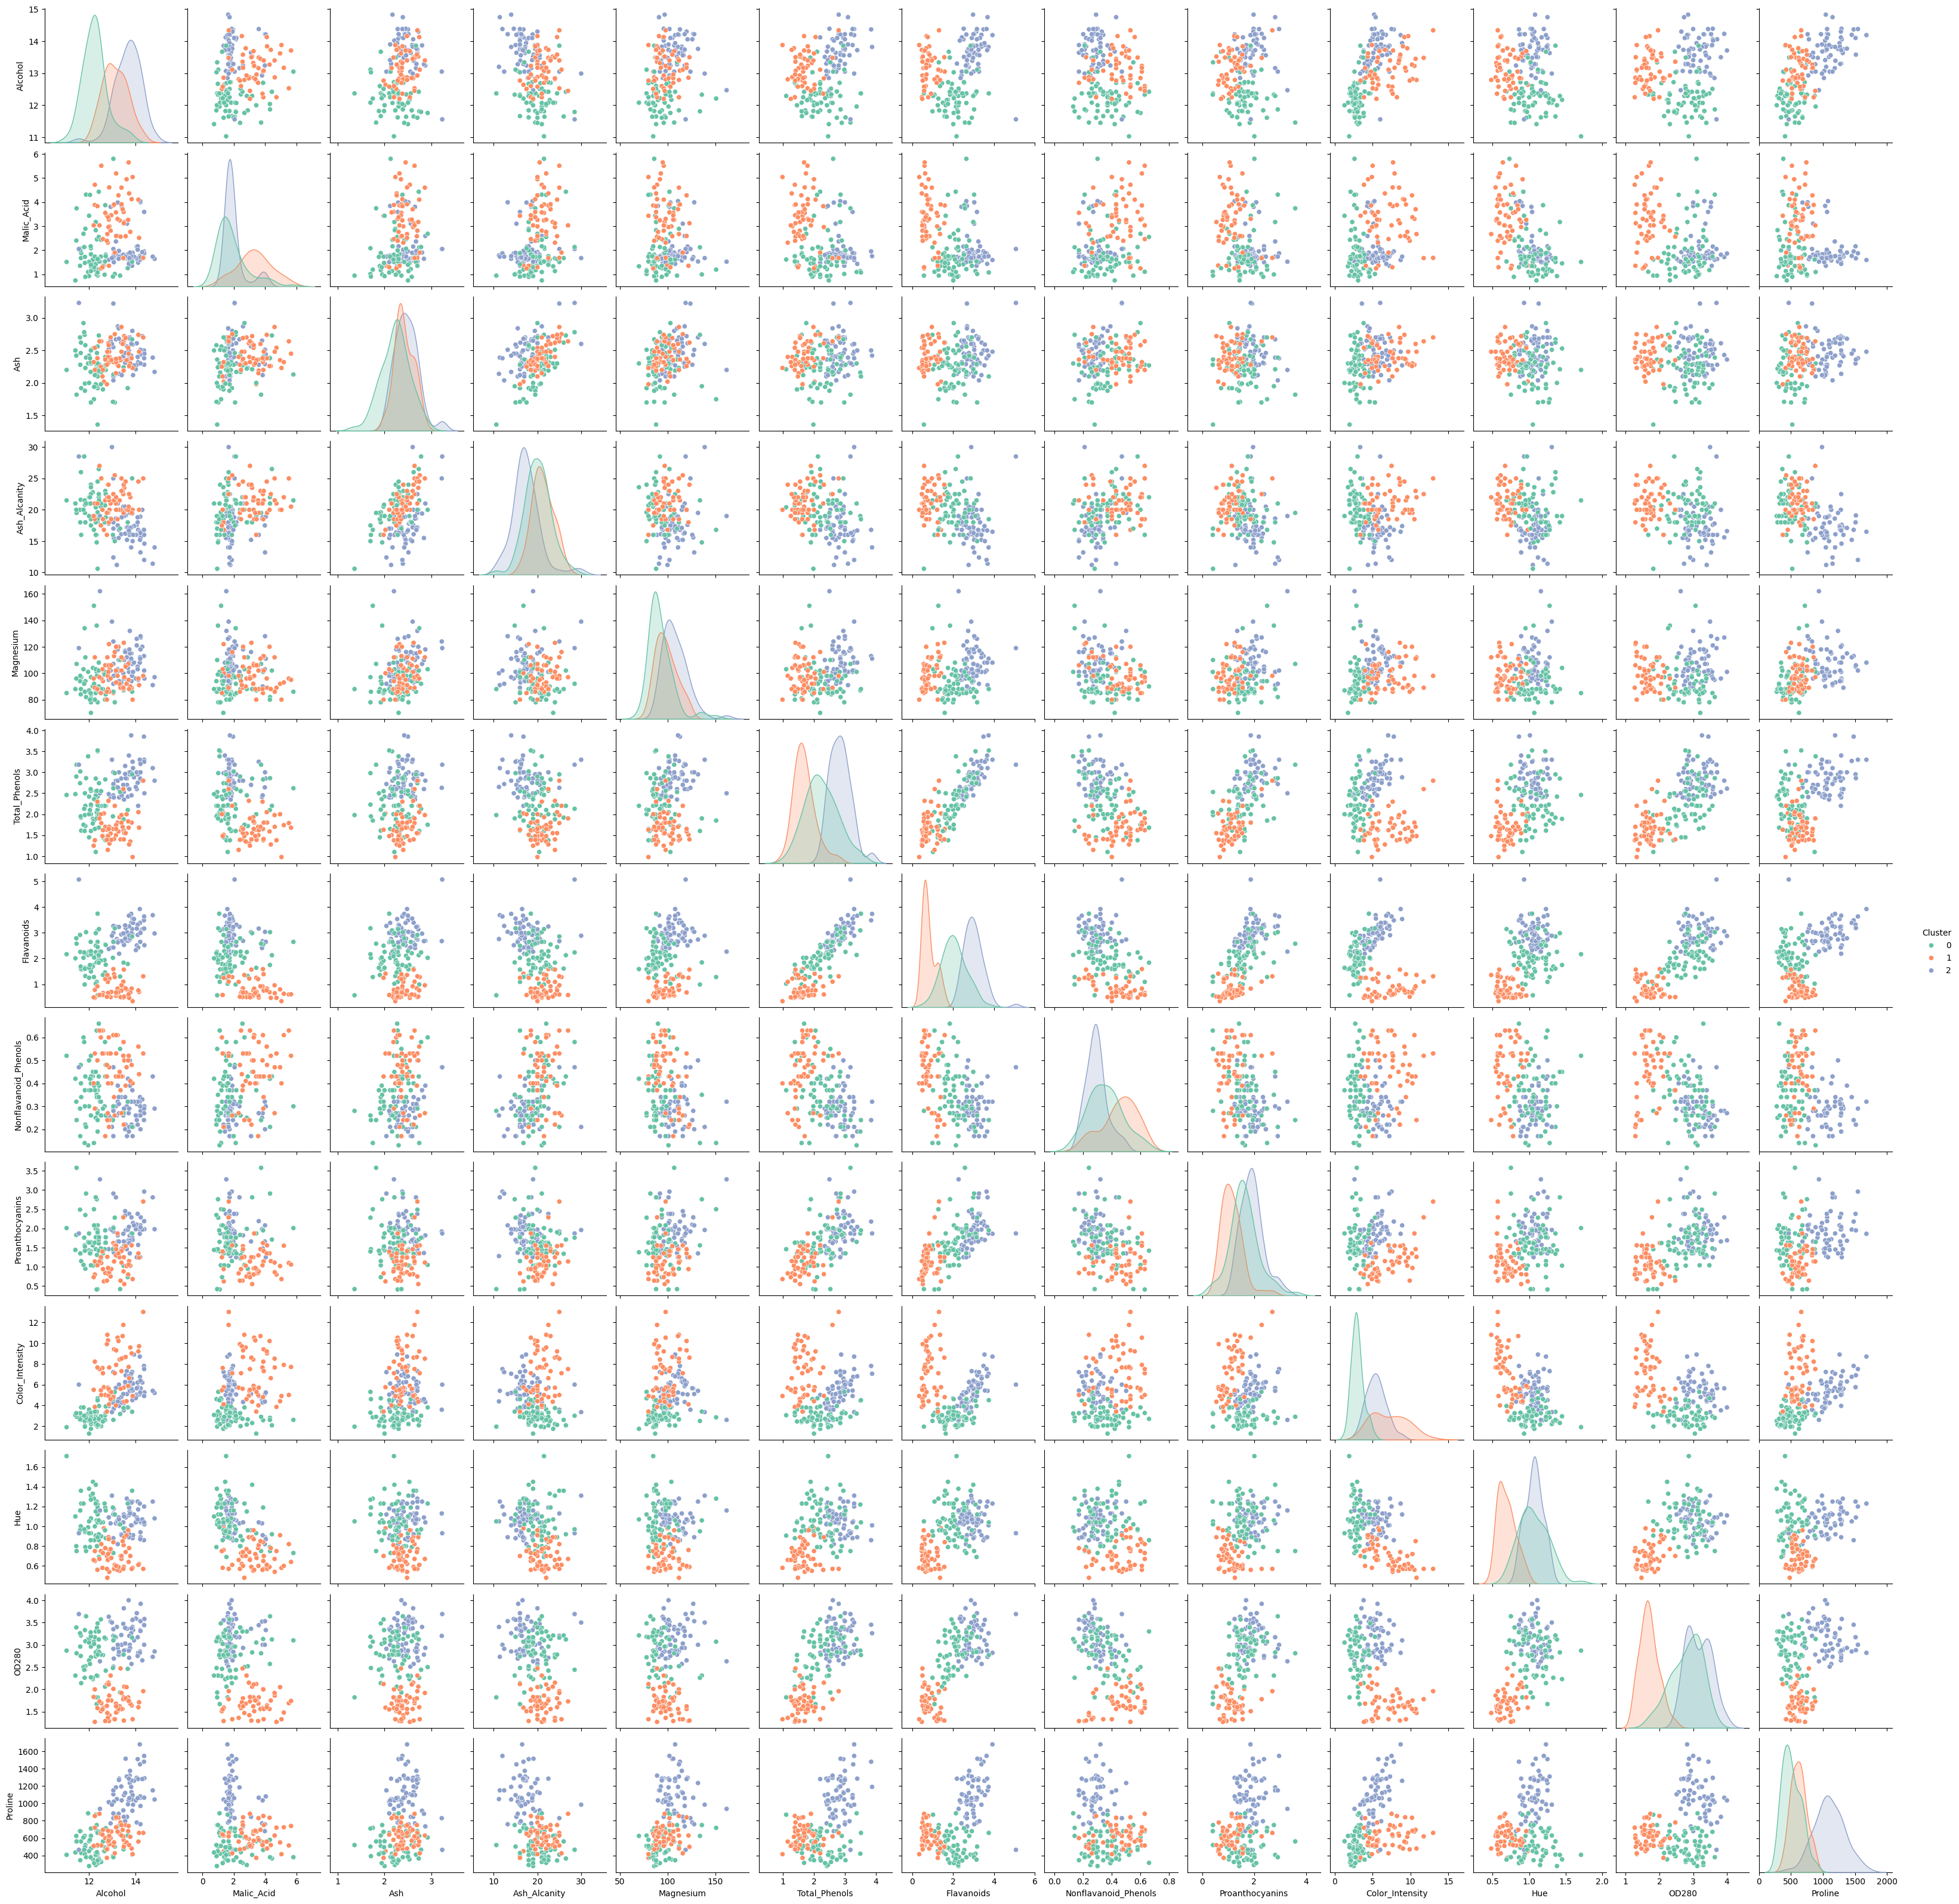

In [47]:
sns.pairplot(df, hue='Cluster', palette='Set2')
plt.show()


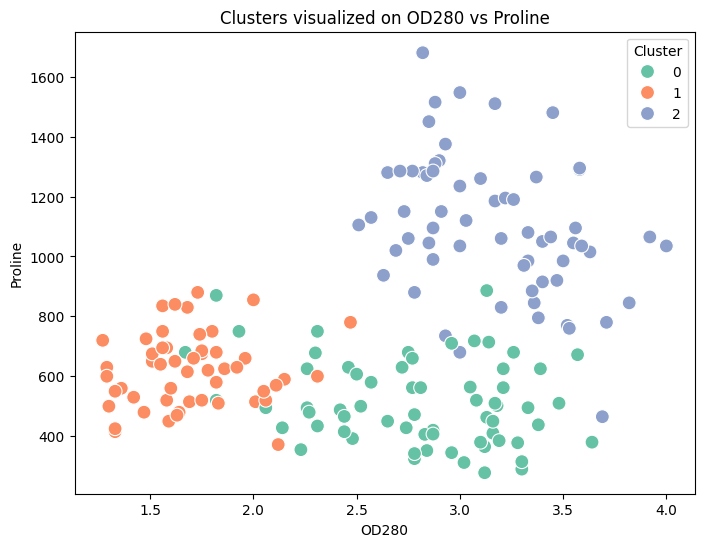

In [48]:
# Choose two features to visualize
feature_x = 'OD280'
feature_y = 'Proline'

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='Cluster', palette='Set2', s=100)
plt.title(f'Clusters visualized on {feature_x} vs {feature_y}')
plt.show()


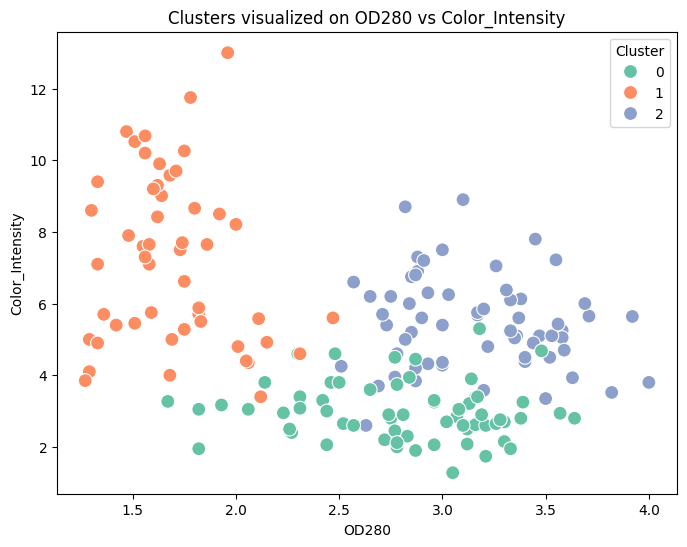

In [49]:
# Choose two features to visualize
feature_x = 'OD280'
feature_y = 'Color_Intensity'

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='Cluster', palette='Set2', s=100)
plt.title(f'Clusters visualized on {feature_x} vs {feature_y}')
plt.show()


### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


In [50]:
for cluster in cluster_means.index:
    print(f"\nCluster {cluster} characteristics:")
    cluster_data = cluster_means.loc[cluster]
    
    # Highest value feature
    max_feature = cluster_data.idxmax()
    max_value = cluster_data.max()
    
    # Lowest value feature
    min_feature = cluster_data.idxmin()
    min_value = cluster_data.min()
    
    print(f" - Highest: {max_feature} ({max_value:.2f}) (mean)")
    print(f" - Lowest: {min_feature} ({min_value:.2f}) (mean)")



Cluster 0 characteristics:
 - Highest: Proline (510.17) (mean)
 - Lowest: Nonflavanoid_Phenols (0.36) (mean)

Cluster 1 characteristics:
 - Highest: Proline (619.06) (mean)
 - Lowest: Nonflavanoid_Phenols (0.45) (mean)

Cluster 2 characteristics:
 - Highest: Proline (1100.23) (mean)
 - Lowest: Nonflavanoid_Phenols (0.29) (mean)


In [55]:
feature_cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
                'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


In [57]:
def interpret_clusters_auto(df, feature_cols, cluster_col='Cluster'):
    cluster_means = df.groupby(cluster_col)[feature_cols].mean()
    
    for cluster in cluster_means.index:
        print(f"\n=== Cluster {cluster} ===")
        cluster_data = cluster_means.loc[cluster]
        
        # Determine highest and lowest features in the cluster
        dominant_feature = cluster_data.idxmax()
        least_feature = cluster_data.idxmin()
        
        # Key features for interpretation
        alcohol = cluster_data['Alcohol']
        color = cluster_data['Color_Intensity']
        flavanoids = cluster_data['Flavanoids']
        total_phenols = cluster_data['Total_Phenols']
        proline = cluster_data['Proline']
        
        # Interpretation logic
        interpretation = []
        
        # Alcohol
        if alcohol >= cluster_means['Alcohol'].max():
            interpretation.append("High Alcohol")
        elif alcohol <= cluster_means['Alcohol'].min():
            interpretation.append("Low Alcohol")
        else:
            interpretation.append("Moderate Alcohol")
        
        # Color Intensity
        if color >= cluster_means['Color_Intensity'].max():
            interpretation.append("Very Dark Color")
        elif color <= cluster_means['Color_Intensity'].min():
            interpretation.append("Light Color")
        else:
            interpretation.append("Moderate Color")
        
        # Phenols
        avg_phenols = (flavanoids + total_phenols)/2
        if avg_phenols >= cluster_means.apply(lambda x: (x['Flavanoids'] + x['Total_Phenols'])/2, axis=1).max():
            interpretation.append("Rich Phenols")
        elif avg_phenols <= cluster_means.apply(lambda x: (x['Flavanoids'] + x['Total_Phenols'])/2, axis=1).min():
            interpretation.append("Low Phenols")
        else:
            interpretation.append("Moderate Phenols")
        
        # Proline
        if proline >= cluster_means['Proline'].max():
            interpretation.append("High Proline")
        elif proline <= cluster_means['Proline'].min():
            interpretation.append("Low Proline")
        else:
            interpretation.append("Moderate Proline")
        
        # Print cluster stats and suggested interpretation
        print("Cluster means (key features):")
        print(cluster_data[['Alcohol', 'Color_Intensity', 'Flavanoids', 'Total_Phenols', 'Proline']])
        print("Interpretation / Suggested Name:", ", ".join(interpretation))


# Example usage
interpret_clusters_auto(df, feature_cols)



=== Cluster 0 ===
Cluster means (key features):
Alcohol             12.250923
Color_Intensity      2.973077
Flavanoids           2.050000
Total_Phenols        2.247692
Proline            510.169231
Name: 0, dtype: float64
Interpretation / Suggested Name: Low Alcohol, Light Color, Moderate Phenols, Low Proline

=== Cluster 1 ===
Cluster means (key features):
Alcohol             13.134118
Color_Intensity      7.234706
Flavanoids           0.818824
Total_Phenols        1.683922
Proline            619.058824
Name: 1, dtype: float64
Interpretation / Suggested Name: Moderate Alcohol, Very Dark Color, Low Phenols, Moderate Proline

=== Cluster 2 ===
Cluster means (key features):
Alcohol              13.676774
Color_Intensity       5.453548
Flavanoids            3.003226
Total_Phenols         2.847581
Proline            1100.225806
Name: 2, dtype: float64
Interpretation / Suggested Name: High Alcohol, Moderate Color, Rich Phenols, High Proline
